In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataTable = pd.read_csv("death .csv")
dataTable.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [3]:
#Cleaning the DataTable 
dataTable.replace('**',np.nan, inplace=True)
dataTable.replace('*',np.nan, inplace=True)
dataTable.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,NaN,NaN,NaN,NaN
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [4]:
dataTable.dtypes

County                                          object
FIPS                                             int64
Met Objective of 45.5? (1)                      object
Age-Adjusted Death Rate                         object
Lower 95% Confidence Interval for Death Rate    object
Upper 95% Confidence Interval for Death Rate    object
Average Deaths per Year                         object
Recent Trend (2)                                object
Recent 5-Year Trend (2) in Death Rates          object
Lower 95% Confidence Interval for Trend         object
Upper 95% Confidence Interval for Trend         object
dtype: object

In [5]:
#Data Wrangling 
dataTable['Age-Adjusted Death Rate'] = dataTable['Age-Adjusted Death Rate'].astype('float')
dataTable['Lower 95% Confidence Interval for Death Rate'] = dataTable['Lower 95% Confidence Interval for Death Rate'].astype('float')
dataTable['Upper 95% Confidence Interval for Death Rate'] = dataTable['Upper 95% Confidence Interval for Death Rate'].astype('float')
dataTable['Average Deaths per Year'] = dataTable['Average Deaths per Year'].str.split(',').str.join('').astype('float')
dataTable['Recent 5-Year Trend (2) in Death Rates'] = dataTable['Recent 5-Year Trend (2) in Death Rates'].astype('float')
dataTable['Lower 95% Confidence Interval for Trend'] = dataTable['Lower 95% Confidence Interval for Trend'].astype('float')
dataTable['Upper 95% Confidence Interval for Trend'] = dataTable['Upper 95% Confidence Interval for Trend'].astype('float')

In [6]:
dataTable.dtypes

County                                           object
FIPS                                              int64
Met Objective of 45.5? (1)                       object
Age-Adjusted Death Rate                         float64
Lower 95% Confidence Interval for Death Rate    float64
Upper 95% Confidence Interval for Death Rate    float64
Average Deaths per Year                         float64
Recent Trend (2)                                 object
Recent 5-Year Trend (2) in Death Rates          float64
Lower 95% Confidence Interval for Trend         float64
Upper 95% Confidence Interval for Trend         float64
dtype: object

In [7]:
dataTable.dropna(inplace=True)
dataTable.shape

(2694, 11)

In [8]:
dt = dataTable.groupby(['Age-Adjusted Death Rate','Average Deaths per Year']).sum().reset_index()
dt.dropna(axis=0, inplace=True)

In [9]:
regr = LinearRegression()

In [10]:
x = np.array(dt['FIPS']).reshape(-1,1)
y = np.array(dt['Average Deaths per Year']).reshape(-1,1)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [12]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [13]:
ypred = regr.predict(xtest)

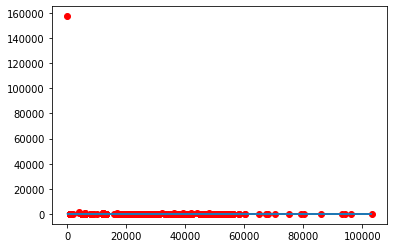

In [14]:
plt.plot(xtest,ypred)
plt.scatter(x=xtest, y=ytest, color = 'r')
plt.show()

In [15]:
print('The score of the linear model is ', regr.score(xtest,ypred))

The score of the linear model is  1.0
